<h1><center> Aplicación de modelos estocásticos para analizar la enfermedad COVID-19 en la cuidad de Bogotá D.C  </center></h1>
<h4><center> Autor: Jesus David Niño Torres </center></h4>
<h4><center> Estudiante de Estadistica de la Universidad Nacional de Colombia</center></h4>



# INTRODUCCION


Los coronavirus son una extensa familia de virus que pueden causar enfermedades tanto en animales como en humanos. En los humanos, se sabe que varios coronavirus causan infecciones respiratorias que pueden ir desde el resfriado común hasta enfermedades más graves. En 2002 y 2012, respectivamente, dos coronavirus altamente patógenos con origen zoonótico, el coronavirus del síndrome respiratorio agudo severo (SARS-CoV) y el coronavirus del síndrome respiratorio del Oriente Medio (MERS-CoV), emergieron en humanos y causaron enfermedades respiratorias fatales, lo que convirtió a los coronavirus emergentes en una nuevo problema de salud pública.

A fines del 2019, un nuevo coronavirus designado como SARS-CoV-2 surgió en la ciudad de Wuhan, China, y provocó un brote de neumonía viral inusual. Al ser altamente transmisible, esta nueva enfermedad por coronavirus, también conocida como enfermedad por coronavirus 2019 (COVID-19), se ha extendido rápidamente por todo el mundo. 


**¿Cuáles son los síntomas de la COVID-19?**

Los síntomas más habituales de la COVID-19 son la fiebre, la tos seca y el cansancio. Otros síntomas menos frecuentes que afectan a algunos pacientes son los dolores y molestias, la congestión nasal, el dolor de cabeza, la conjuntivitis, el dolor de garganta, la diarrea, la pérdida del gusto o el olfato y las erupciones cutáneas o cambios de color en los dedos de las manos o los pies. Estos síntomas suelen ser leves y comienzan gradualmente. Algunas de las personas infectadas solo presentan síntomas levísimos.

La mayoría de las personas (alrededor del 80%) se recuperan de la enfermedad sin necesidad de tratamiento hospitalario. Alrededor de 1 de cada 5 personas que contraen la COVID‑19 acaba presentando un cuadro grave y experimenta dificultades para respirar. Las personas mayores y las que padecen afecciones médicas previas como hipertensión arterial, problemas cardiacos o pulmonares, diabetes o cáncer tienen más probabilidades de presentar cuadros graves. Sin embargo, cualquier persona puede contraer la COVID‑19 y caer gravemente enferma. Las personas de cualquier edad que tengan fiebre o tos y además respiren con dificultad, sientan dolor u opresión en el pecho o tengan dificultades para hablar o moverse deben solicitar atención médica inmediatamente. Si es posible, se recomienda llamar primero al profesional sanitario o centro médico para que estos remitan al paciente al establecimiento sanitario adecuado.

**¿Cómo se propaga la COVID‑19?**

Una persona puede contraer la COVID‑19 por contacto con otra que esté infectada por el virus. La enfermedad se propaga principalmente de persona a persona a través de las gotículas que salen despedidas de la nariz o la boca de una persona infectada al toser, estornudar o hablar. Estas gotículas son relativamente pesadas, no llegan muy lejos y caen rápidamente al suelo. Una persona puede contraer la COVID‑19 si inhala las gotículas procedentes de una persona infectada por el virus. Por eso es importante mantenerse al menos a un metro de distancia de los demás. Estas gotículas pueden caer sobre los objetos y superficies que rodean a la persona, como mesas, pomos y barandillas, de modo que otras personas pueden infectarse si tocan esos objetos o superficies y luego se tocan los ojos, la nariz o la boca. Por ello es importante lavarse las manos frecuentemente con agua y jabón o con un desinfectante a base de alcohol. 

**¿Cuál es la diferencia entre aislamiento, cuarentena y distanciamiento?**

La cuarentena significa restringir las actividades o separar a las personas que no están enfermas pero que pueden haber estado expuestas a la COVID‑19. El objetivo es prevenir la propagación de la enfermedad en el momento en que las personas empiezan a presentar síntomas.

El aislamiento significa separar a las personas que están enfermas con síntomas de COVID‑19 y pueden ser contagiosas para prevenir la propagación de la enfermedad.

El distanciamiento físico significa estar físicamente separado. La OMS recomienda mantener una distancia de al menos un metro con los demás. Es una medida general que todas las personas deberían adoptar incluso si se encuentran bien y no han tenido una exposición conocida a la COVID‑19.

**Referencias**

https://www.nature.com/articles/s41579-020-00459-7

https://www.who.int/es/emergencies/diseases/novel-coronavirus-2019/advice-for-public/q-a-coronaviruses

https://mrc-ide.github.io/global-lmic-reports/parameters.html

**Referencia de los datos**

https://www.ins.gov.co/Noticias/Paginas/Coronavirus.aspx

## MODELO DETERMINISTA SEIRD 

### Modelo de compartimientos SEIRD

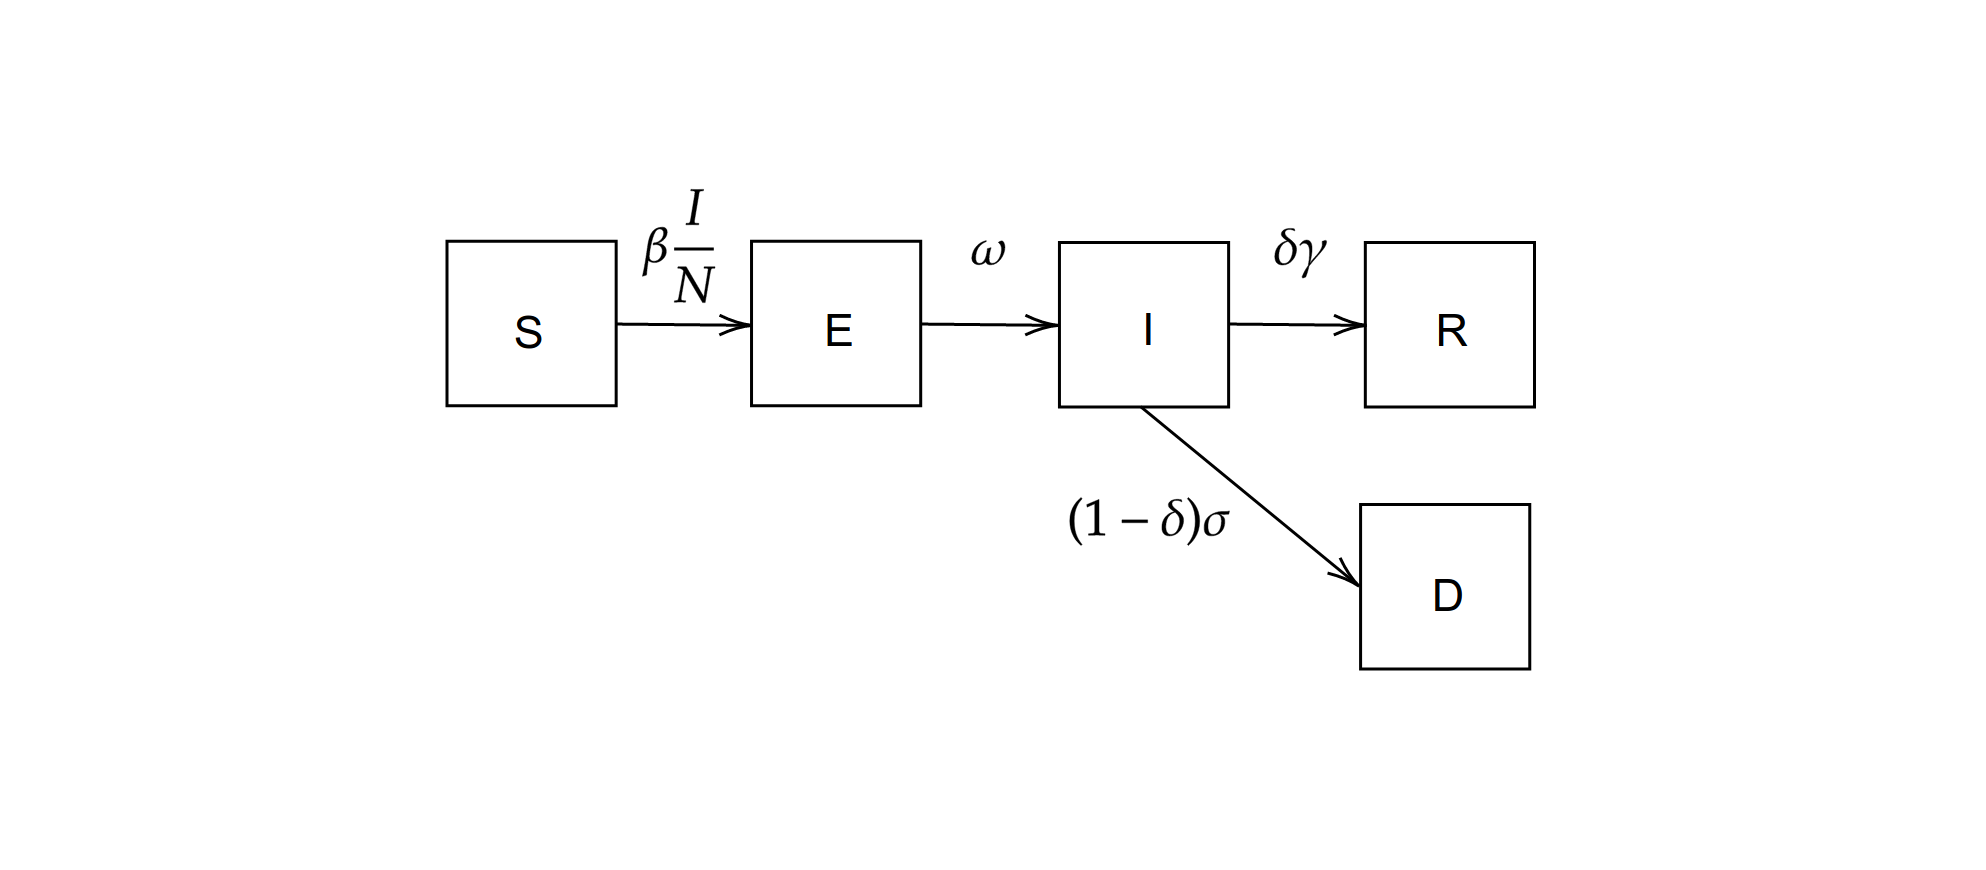



Sea las varibales $S(t), E(t), I(t), R(t) $ y $ D(t)$ que representan:

- $N$: Total de la poblacion

- $S(t)$: Número de personas susceptibles en el tiempo $t$

- $E(t)$: Número de personas expuestas en el tiempo $t$

- $I(t)$: Número de personas infecciosas en el tiempo $t$

- $R(t)$: Número de personas recuperadas en el tiempo $t$

- $D(t)$: Número de personas fallecidas en el tiempo $t$

Y lo parametros que denotan: 

- $\beta$: Tasa de transmisión

- $\omega$: Periodo de incubación

- $\gamma$: Tasa de recuperacion

- $\sigma$: Tasa de mortalidad

- $\delta$: Probabilidad de que un individuo del grupo I se recupere

- $R_0$: Número reproductivo basico ( $ = \beta/\gamma$)



$$
\begin{align}
\frac{dS}{dt} & = -\beta  S  \frac{I}{N} \\
\frac{dE}{dt} & = \beta  I  \frac{S}{N} - \omega  E\\
\frac{dI}{dt} & = \omega  E - \delta  \gamma  I - (1-\delta)  \sigma  I\\
\frac{dR}{dt} & = \delta  \gamma  I \\
\frac{dD}{dt} & = (1-\delta)  \sigma  I
\end{align}
$$

### Librerias

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.integrate import odeint
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

### Condiciones iniciales

In [ ]:
# Parametros
beta = 0.95
omega = 1/5
gamma = 1/5
sigma = 1/6
delta = 0.7
print('R0:', beta/((gamma*delta)+((1-delta)*sigma)))

# Condiciones iniciales
S0 = 7182000-1
E0 = 0
I0 = 1
R0 = 0
D0 = 0
new_infections = 0 

# Vector de condiciones iniciales
compartments_int = S0, E0, I0, R0, D0, new_infections

# Total de la poblacion
N = S0+E0+I0+R0+D0
print('Total de la poblacion:', N)

# Tiempo
t = np.linspace(0, 150, 150)

R0: 5.0
Total de la poblacion: 7182000


### Modelo ODE 

In [ ]:
# Modelo de ecuaciones diferenciales
def model(compartments, t, N, beta, omega, gamma, sigma, delta):
    # Condiciones iniciales 
    S, E, I, R, D, new_infections = compartments 
    # Estructura del modelo
    new_infections = beta*(S*I/N)
    dSdt = -new_infections
    dEdt = new_infections - omega*E
    dIdt = omega*E - delta*gamma*I - (1-delta)*sigma*I
    dRdt = delta*gamma*I 
    dDdt = (1-delta)*sigma*I
    return dSdt, dEdt, dIdt, dRdt, dDdt, new_infections

In [ ]:
# Solucion del sistema de ecuaciones diferenciales
SEIRD_ODE = odeint(model, compartments_int, t, args=(N, beta, omega, gamma, sigma, delta))
S, E, I, R, D, new_infections = SEIRD_ODE.T
SEIRD_ODE_df = pd.DataFrame({"S": S, "E": E, "I": I, "R": R, "D": D, "Infectados acumulados": new_infections, "t": t})
SEIRD_ODE_melt = pd.melt(SEIRD_ODE_df, id_vars=['t'], value_vars=['S','E','I','R','D','Infectados acumulados'])

### Graficos

In [ ]:
fig = px.line(SEIRD_ODE_melt, x = 't', y = 'value', color='variable',template='plotly_white',color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(autosize=False, width=1000, height=500, yaxis=dict(title_text="Número de personas"), xaxis=dict(title_text="Tiempo (días)"))
fig['data'][0]['name'] = 'Suceptibles'
fig['data'][1]['name'] = 'Expuestas'
fig['data'][2]['name'] = 'Infectadas'
fig['data'][3]['name'] = 'Recuperadas'
fig['data'][4]['name'] = 'Muertas'
fig['data'][5]['name'] = 'Infectadas Acumuladas'
# fig.update_layout(title={'text':' Titulo <br><sub> Subtitulo </sub>'}, font=dict(family="Arial"))
fig.update_layout(title={'text':' Modelo determinista SEIRD COVID-19 para Bogotá D.C'}, font=dict(family="sans-serif", color='#3c4142', size = 13))
fig.show()

In [ ]:
fig1 = px.line(SEIRD_ODE_df, x = 't', y = 'I', color_discrete_sequence=px.colors.qualitative.G10)
fig2 = px.line(SEIRD_ODE_df, x = 't', y = 'Infectados acumulados', color_discrete_sequence=px.colors.qualitative.G10)
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
fig = make_subplots(rows=1, cols=2, subplot_titles=("Número de personas infectadas  por COVID-19 en Bogotá D.C", "Número de personas infectadas acumuladas por COVID-19 en Bogotá D.C"), shared_xaxes=False)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig['layout']['xaxis']['title']='Tiempo (días)'
fig['layout']['xaxis2']['title']='Tiempo (días)'
fig['layout']['yaxis']['title']='Número de personas'
fig['layout']['yaxis2']['title']='Número de personas'
fig.update_layout(template="plotly_white", title={'text':' Modelo determinista SEIRD COVID-19'}, font=dict(family="sans-serif", color='#3c4142', size = 13))

In [ ]:
fig1 = px.line(SEIRD_ODE_df, x = 't', y = 'R', color_discrete_sequence=px.colors.qualitative.G10)
fig2 = px.line(SEIRD_ODE_df, x = 't', y = 'D', color_discrete_sequence=px.colors.qualitative.G10)
trace1 = fig1['data'][0]
trace2 = fig2['data'][0]
fig = make_subplots(rows=1, cols=2, subplot_titles=("Número de personas recuperadas por COVID-19 en Bogotá D.C", "Número de personas muertas por COVID-19 en Bogotá D.C"), shared_xaxes=False)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig['layout']['xaxis']['title']='Tiempo (días)'
fig['layout']['xaxis2']['title']='Tiempo (días)'
fig['layout']['yaxis']['title']='Número de personas'
fig.update_layout(template="plotly_white", title={'text':' Modelo determinista SEIRD COVID-19'}, font=dict(family="sans-serif", color='#3c4142', size = 13))

In [ ]:
N-SEIRD_ODE_df['S']

0      1.000000e+00
1      1.897269e+00
2      2.780275e+00
3      3.767596e+00
4      4.952767e+00
           ...     
145    7.131888e+06
146    7.131888e+06
147    7.131888e+06
148    7.131889e+06
149    7.131889e+06
Name: S, Length: 150, dtype: float64

In [ ]:
SEIRD_ODE_df

,S,E,I,R,D,Infectados acumulados,t
0,7.181999e+06,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,7.181998e+06,0.811379,0.906436,1.322292e-01,4.722470e-02,8.972692e-01,1.006711
2,7.181997e+06,1.463997,0.960223,2.623564e-01,9.369872e-02,1.780275e+00,2.013423
3,7.181996e+06,2.093621,1.120456,4.078564e-01,1.456630e-01,2.767596e+00,3.020134
4,7.181995e+06,2.788966,1.373247,5.825132e-01,2.080404e-01,3.952767e+00,4.026846
...,...,...,...,...,...,...,...
145,5.011220e+04,8.762447,54.576802,5.255029e+06,1.876796e+06,7.131887e+06,145.973154
146,5.011186e+04,7.468640,46.555572,5.255036e+06,1.876798e+06,7.131887e+06,146.979866
147,5.011158e+04,6.366070,39.712244,5.255042e+06,1.876801e+06,7.131887e+06,147.986577
148,5.011133e+04,5.426430,33.874051,5.255047e+06,1.876802e+06,7.131888e+06,148.993289


## MODELO ESTOCASTICO SEIRD 


### Librerias

In [ ]:
from time import time
from tqdm import tqdm, trange
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

### Algoritmo Gillespie

#### Funcion del Gillespie SEIRD

In [ ]:
class SEIRD_G(object):
    
    def __init__(self, population_size, beta, omega, gamma, sigma, delta, initial_conditions=None): 
        """
        Almacenar parámetros y estado inicial del modelo estocástico SIR.
        """

        # Almacenar parámetros
        self.N = population_size
        self.beta = beta
        self.omega = omega
        self.gamma = gamma
        self.sigma = sigma
        self.delta = delta
        
        # Almacenar estados 
        if initial_conditions is None:
          self.initial_conditions = {"S": population_size-1, "E": 0, "I": 1, "R": 0, "D": 0}
        else:
          self.initial_conditions = initial_conditions
        self.state = self.initial_conditions
    
        self.t = [0]
        self.trace = [list(self.state.values())]

    def reset_state(self):
        
        self.state = self.initial_conditions
        self.t = [0]
        self.trace = [list(self.state.values())]
    
    def gillespie(self, t_max=None):
        """
        Trazar una realización del proceso estocástico SEIRD utilizando el algoritmo de 
        Gillespie, hasta un tiempo t_max o hasta que no sean posibles más eventos.
        """
        
        # Restablecer el estado 
        self.reset_state()
        
        # Si no se proporciona t_max, contine hasta que no sean posibles más transiciones
        if t_max is None:
            t_max = np.inf
        
        # Realice eventos aleatorios hasta t> = t_max
        while self.t[-1] < t_max:
            
            # Calcule las tasas a las que ocurre cada transición
            rates = np.array([
                self.beta * self.state["S"] * self.state["I"] / self.N,  # S -> E
                self.omega * self.state["E"],                            # E -> I  
                self.gamma * self.delta * self.state["I"],               # I -> R
                self.sigma * (1 - self.delta) * self.state["I"]          # I -> D
            ])
            
            # Compruebe si hay errores en la integración
            if np.any(rates < 0):
                raise ValueError("Negative rate calculated : {}".format(rates))
                
            # Verifique si alguna tasa es válida o si no hay más transiciones válidas
            if np.all(rates == 0):
                self.trace = np.array(self.trace)
                return 
            
            # Si tenemos eventos válidos, comience trazando un tiempo de espera
            self.t.append(self.t[-1] - np.log(np.random.uniform())/np.sum(rates))
            
            # Determine qué transición tiene lugar
            transition = np.min(np.where(np.random.uniform() * np.sum(rates) <= np.cumsum(rates)))
            
            # Actualice el estado
            if transition == 0:    # Exposición
                self.state["S"] -= 1
                self.state["E"] += 1
            elif transition == 1:  # Infeccción
                self.state["E"] -= 1
                self.state["I"] += 1
            elif transition == 2:  # Recuperación
                self.state["I"] -= 1
                self.state["R"] += 1
            elif transition == 3:  # Muerte
                self.state["I"] -= 1
                self.state["D"] += 1
                                                  
            # Agrege este estado a la traza
            self.trace.append(list(self.state.values()))
        
        self.trace = np.array(self.trace)
        return    

#### Condiciones iniciales 

In [ ]:
# Genere algunas realizaciones del proceso SEIRD
t_gillespie = []
gillespie = []

N = 8000
beta = 0.25
omega = 1/4
gamma = 1/10
sigma = 1/9
delta = 0.8

seird_g = SEIRD_G(N, beta, omega, gamma, sigma, delta)

#### Simulacion para personas infectadas

In [ ]:
# Simulacion
for _ in trange(20, desc="Simulating"):
    
    seird_g = SEIRD_G(N, beta, omega, gamma, sigma, delta)
    seird_g.gillespie()
    t_gillespie.append(seird_g.t)
    gillespie.append(seird_g.trace[:, 2])

Simulating: 100%|██████████| 20/20 [00:10<00:00,  1.89it/s]


#### Graficos

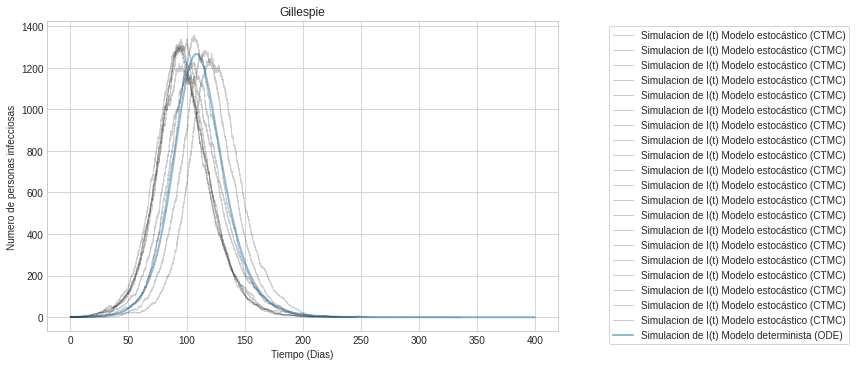

In [ ]:
# Grafico del modelo SEIRD
plt.figure(figsize=(15, 5))
ax = plt.axes()
ax.set_ylim(0,550)

plt.subplot(121)
plt.title("Gillespie")
for tt, realisation in zip(t_gillespie, gillespie):
  plt.plot(tt, realisation, alpha=0.2, lw=1, label='Simulacion de I(t) Modelo estocástico (CTMC)', c="k")
  
plt.plot(t, I, alpha=0.5, lw=2, label='Simulacion de I(t) Modelo determinista (ODE)')  
plt.tight_layout()  
plt.xlabel("Tiempo (Dias)")
plt.ylabel("Numero de personas infecciosas")
plt.legend(loc = 'upper right', frameon=True, bbox_to_anchor=(1.58, 1.0));

### Algoritmo Tau Leaping

#### Funcion del Tau Leap SEIRD

In [ ]:
class SEIRD_T(object):
    
    def __init__(self, population_size, beta, omega, gamma, sigma, delta, initial_conditions=None): 
        """
        Almacenar parámetros y estado inicial del modelo estocástico SIR.
        """

        # Almacenar parámetros
        self.N = population_size
        self.beta = beta
        self.omega = omega
        self.gamma = gamma
        self.sigma = sigma
        self.delta = delta
        
        # Almacenar estados 
        if initial_conditions is None:
          self.initial_conditions = {"S": population_size-1, "E": 0, "I": 1, "R": 0, "D": 0, "N": 0}
        else:
          self.initial_conditions = initial_conditions
        self.state = self.initial_conditions
    
        self.t = [0]
        self.trace = [list(self.state.values())]

    def reset_state(self):
        
        self.state = self.initial_conditions
        self.t = [0]
        self.trace = [list(self.state.values())]
    
    def tau_leap(self, tau, t_max=None):
        """
        Dibuje una realización del proceso estocástico SEIRD utilizando el algoritmo de salto tau,
        hasta algún tiempo t_max o hasta que no sean posibles más eventos.
        
        Tau-jump calcula el número de cada transición que se estima que ocurrirá dentro de algún tiempo
        tau. Si el número de estos eventos empujaría un estado a un valor no válido, en su lugar
        aplicar estas transiciones al azar hasta que alcancemos el límite de validez estatal. Para el SEIRD
        modelo, este límite es S = 0, E = 0, I = 0, R = 0 o D = 0; no podemos caer en valores de estado negativos.
        """
        
        # Restablecer el estado 
        self.reset_state()
        
        # Si no se proporciona t_max, contine hasta que no sean posibles más transiciones
        if t_max is None:
            t_max = np.inf
        
        # Realice eventos aleatorios hasta t> = t_max
        while self.t[-1] < t_max:
            
            # Calcule las tasas a las que ocurre cada transición
            rates = np.array([
                self.beta * self.state["S"] * self.state["I"] / self.N,  # S -> E
                self.omega * self.state["E"],                            # E -> I  
                self.gamma * self.delta * self.state["I"],               # I -> R
                self.sigma * (1 - self.delta) * self.state["I"],         # I -> D
                self.beta * self.state["S"] * self.state["I"] / self.N,  # S -> N
            ])
            
            # Compruebe si hay errores en la integración
            if np.any(rates < 0):
                raise ValueError("Negative rate calculated : {}".format(rates))
                
            # Verifique si alguna tasa es válida o si no hay más transiciones válidas
            if np.all(rates == 0):
                self.trace = np.array(self.trace)
                return 

            # Estime la cantidad de veces que ocurre cada transición
            estimated_events = np.array([np.random.poisson(rate * tau) for rate in rates], dtype=int)
            
            # Calcule el efecto de estas transiciones
            S = self.state["S"] - estimated_events[0]
            E = self.state["E"] + estimated_events[0] - estimated_events[1]
            I = self.state["I"] + estimated_events[1] - estimated_events[2] - estimated_events[3] 
            R = self.state["R"] + estimated_events[2]
            D = self.state["D"] + estimated_events[3]
            N = self.state["N"] + estimated_events[0]
            
            # Si la aplicación de todos estos eventos llevaría a cualquier estado a valores negativos,
            # reescalar tau y el número de transiciones hasta que el estado sea válido
            if S < 0 or E < 0 or I < 0 or R < 0 or D <0 or N < 0:
                
                # Si aplicamos estos eventos uno a la vez, ¿cuánto tiempo valen?
                delta_tau = tau / estimated_events.sum()
                update_tau = 0
                
                # Aplicar los eventos al aleatorios, uno a la vez, en lugar de todos juntos
                while estimated_events.sum() > 0:
                    
                    update_S = self.state["S"]                    
                    update_E = self.state["E"]
                    update_I = self.state["I"]
                    update_R = self.state["R"]
                    update_D = self.state["D"]
                    update_N = self.state["N"]
                    
                    # Seleccione un evento al azar de los que se estimó que ocurrieron
                    selected_event = np.random.multinomial(1, estimated_events / estimated_events.sum())
                    
                    # Elimina ese evento de la pila de eventos estimados
                    estimated_events -= selected_event
                    
                    # Aplicar el evento
                    transition = np.where(selected_event)[0][0]
                    
                    if transition == 0:  # Expuesto
                        if update_S == 0:  # Si el evento no puede suceder, deténgase aquí
                            break
                        update_S -= 1
                        update_E += 1                        
                    elif transition == 1:  # Infectado 
                        if update_E == 0:
                            break
                        update_E -= 1
                        update_I += 1
                    elif transition == 2:  # Recuperado
                        if update_I == 0:
                            break
                        update_I -= 1
                        update_R += 1
                    elif transition == 3:  # Muerto
                        if update_I == 0:
                            break
                        update_I -= 1
                        update_D += 1                                       
                    elif transition == 4:  # Muerto
                        if update_S == 0:
                            break
                        update_S -= 1
                        update_N += 1

                    # Empuje el tiempo hacia adelante una tau fraccional
                    update_tau += delta_tau
                    
                # Cuando termine de aplicar eventos uno a la vez hasta que no sean posibles más, actualice el estado
                self.state["S"] = update_S                
                self.state["E"] = update_E
                self.state["I"] = update_I
                self.state["R"] = update_R 
                self.state["D"] = update_D
                self.state["N"] = update_N
                self.t.append(self.t[-1] + update_tau)
                
            # De lo contrario, aplique todos los eventos a la vez para el tau completo
            else:
              self.state["S"] = S
              self.state["E"] = E
              self.state["I"] = I
              self.state["R"] = R 
              self.state["N"] = N
              self.t.append(self.t[-1] + tau)            

            # Agrega este estado a la traza
            self.trace.append(list(self.state.values()))
        
        self.trace = np.array(self.trace)
        return

#### Condiciones iniciales

In [ ]:
# Genere algunas realizaciones del proceso SEIRD
t_tauleaping = []
tauleaping1 = []
tauleaping2 = []
tauleaping3 = []
tauleaping4 = []
tauleaping5 = []
tauleaping6 = []

N = 8000
beta = 0.25
omega = 1/4
gamma = 1/10
sigma = 1/9
delta = 0.8

seird_t = SEIRD_T(N, beta, omega, gamma, sigma, delta)

#### Simulacion 

In [ ]:
for _ in trange(20, desc="Simulating"):
    
    seird_t = SEIRD_T(N, beta, omega, gamma, sigma, delta)
    seird_t.tau_leap(0.2)
    t_tauleaping.append(seird_t.t)
    tauleaping1.append(seird_t.trace[:, 0]) # S
    tauleaping2.append(seird_t.trace[:, 1]) # E
    tauleaping3.append(seird_t.trace[:, 2]) # I
    tauleaping4.append(seird_t.trace[:, 3]) # R
    tauleaping5.append(seird_t.trace[:, 4]) # D
    tauleaping6.append(seird_t.trace[:, 5]) # N

Simulating: 100%|██████████| 20/20 [00:01<00:00, 15.84it/s]


Grafico para nuevas infecciones acumuladas

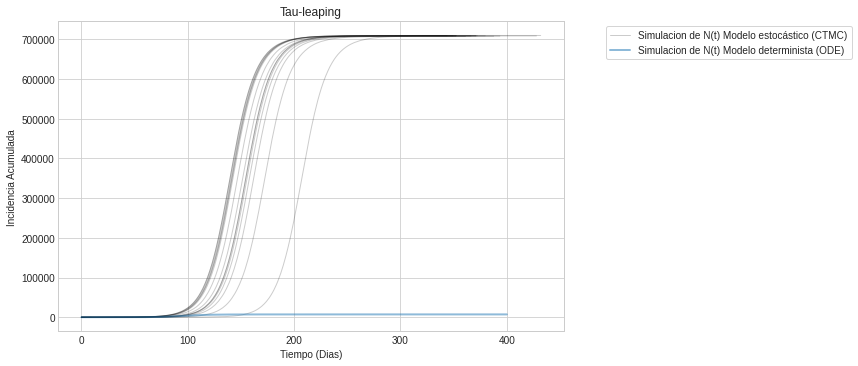

In [ ]:
# Grafico del modelo SEIRD
plt.figure(figsize=(15, 5))
ax = plt.axes()
ax.set_ylim(0,550)

plt.subplot(121)
plt.title("Tau-leaping")
for tt, realisation in zip(t_tauleaping, tauleaping6):
    plt.plot(tt, realisation, alpha=0.2, lw=1, c="k")

plt.plot(tt, realisation, alpha=0.2, lw=1, label='Simulacion de N(t) Modelo estocástico (CTMC)', c="k")
plt.plot(t, new_infections, alpha=0.5, lw=2, label='Simulacion de N(t) Modelo determinista (ODE)')  
plt.tight_layout()  
plt.xlabel("Tiempo (Dias)")
plt.ylabel("Incidencia Acumulada")
plt.legend(loc = 'upper right', frameon=True, bbox_to_anchor=(1.58, 1.0));

Grafico para personas infectadas

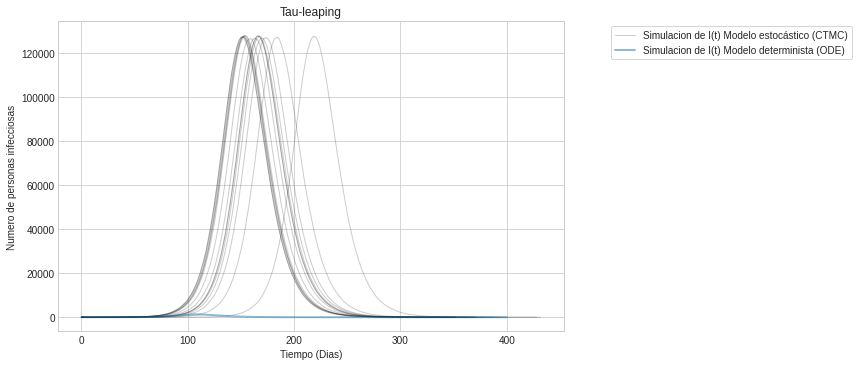

In [ ]:
# Grafico del modelo SEIRD
plt.figure(figsize=(15, 5))
ax = plt.axes()
ax.set_ylim(0,550)

plt.subplot(121)
plt.title("Tau-leaping")
for tt, realisation in zip(t_tauleaping, tauleaping3):
    plt.plot(tt, realisation, alpha=0.2, lw=1, c="k")

plt.plot(tt, realisation, alpha=0.2, lw=1, label='Simulacion de I(t) Modelo estocástico (CTMC)', c="k")
plt.plot(t, I, alpha=0.5, lw=2, label='Simulacion de I(t) Modelo determinista (ODE)')  
plt.tight_layout()  
plt.xlabel("Tiempo (Dias)")
plt.ylabel("Numero de personas infecciosas")
plt.legend(loc = 'upper right', frameon=True, bbox_to_anchor=(1.58, 1.0));